## EDA & Cleaning: Exploring continuous features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

### Read in data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('../../../titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Name, PassengerId, Ticket are not useful features for prediction of survival.

Lets look at Cabin, specifically to see if a certain cabin level is contributing to survival rate,

In [2]:
titanic['Cabin_letter'] = titanic['Cabin'].dropna().apply(lambda x: x[0])
titanic['Cabin_letter'].dropna().value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_letter, dtype: int64

<AxesSubplot:>

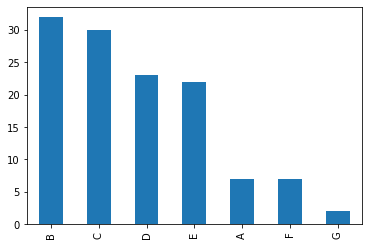

In [3]:
titanic[titanic['Survived']==1].dropna()['Cabin_letter'].value_counts().plot(kind='bar')

Following people with resp cabins survived

    B    32
    C    30
    D    23
    E    22
    A     7
    F     7
    G     2

<AxesSubplot:>

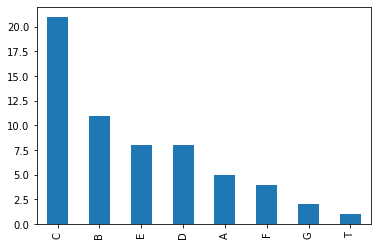

In [4]:
titanic[titanic['Survived']==0].dropna()['Cabin_letter'].value_counts().plot(kind='bar')

Following people woth resp cabins did not survive

    C    21
    B    11
    E     8
    D     8
    A     5
    F     4
    G     2
    T     1

Lets look the data on same plot

<AxesSubplot:>

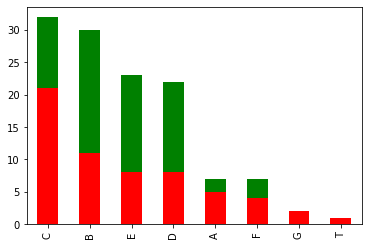

In [5]:
titanic[titanic['Survived']==1].dropna()['Cabin_letter'].value_counts().plot(kind='bar', color='g')
titanic[titanic['Survived']==0].dropna()['Cabin_letter'].value_counts().plot(kind='bar', color='r')

So from the looks of it, poeple with C, B, E, D, A, F have survived more in numbers while none have survived from cabins G and T

Lets look at same data in different way, 

In [6]:
titanic.groupby(titanic['Cabin'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
False,455.401961,0.666667,1.196078,35.829297,0.441176,0.436275,76.141504
True,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325


Here, Survived being False is 0.66, it means, where Cabin was not null, in other words, where people had cabin, their chances of survival was 66%, while people with no cabins had survival rate of only 33%

Hence lets, create new Cabin_availability feature

In [7]:
titanic['Cabin_available'] = np.where(titanic.Cabin.isnull(), 0, 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_letter,Cabin_available
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,0


In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_letter',
       'Cabin_available'],
      dtype='object')

In [9]:
# Drop features that you may not need
drop_feat = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Cabin_letter']
titanic.drop(drop_feat, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_available
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


### Explore continuous features

In [10]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_available
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Note: Only 38.38 % of total 891 survived

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              714 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Fare             891 non-null    float64
 7   Embarked         889 non-null    object 
 8   Cabin_available  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [12]:
titanic.isna().sum()

Survived             0
Pclass               0
Sex                  0
Age                177
SibSp                0
Parch                0
Fare                 0
Embarked             2
Cabin_available      0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Count'>

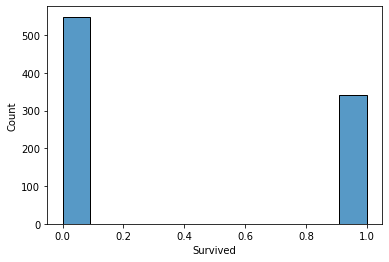

In [13]:

sns.histplot(titanic.Survived)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

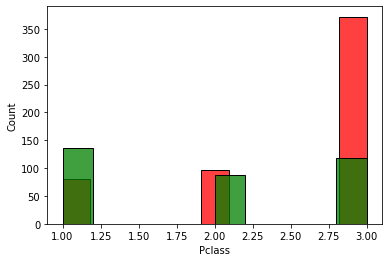

In [14]:
#titanic.Pclass.value_counts().plot(kind='bar')

sns.histplot(titanic[titanic.Survived==0]['Pclass'], color='r')
sns.histplot(titanic[titanic.Survived==1]['Pclass'], color='g')

<AxesSubplot:xlabel='Age', ylabel='Count'>

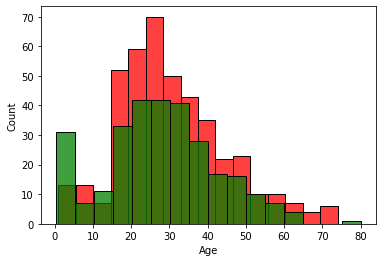

In [15]:
#plt.figure(figsize=(15,5))
#titanic.Age.value_counts().plot(kind='hist')

#sns.histplot(titanic.Age)
sns.histplot(titanic[titanic.Survived==0]['Age'], color='r', legend=True)
sns.histplot(titanic[titanic.Survived==1]['Age'], color='g', legend=True)


<AxesSubplot:xlabel='SibSp', ylabel='Count'>

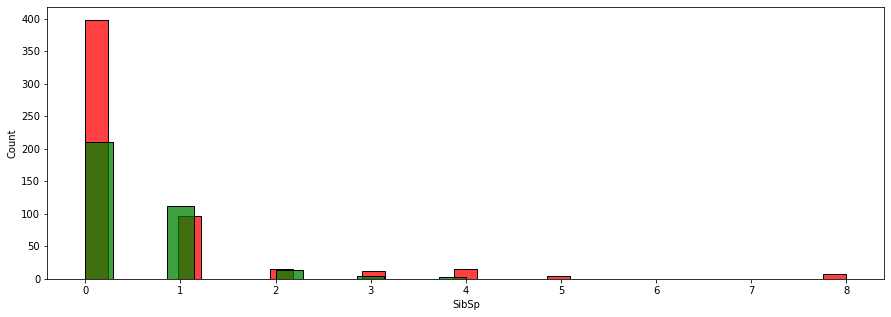

In [16]:
plt.figure(figsize=(15,5))
#titanic.SibSp.value_counts().plot(kind='bar')

#sns.histplot(titanic.SibSp)
sns.histplot(titanic[titanic.Survived==0]['SibSp'], color='r', legend=True)
sns.histplot(titanic[titanic.Survived==1]['SibSp'], color='g', legend=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

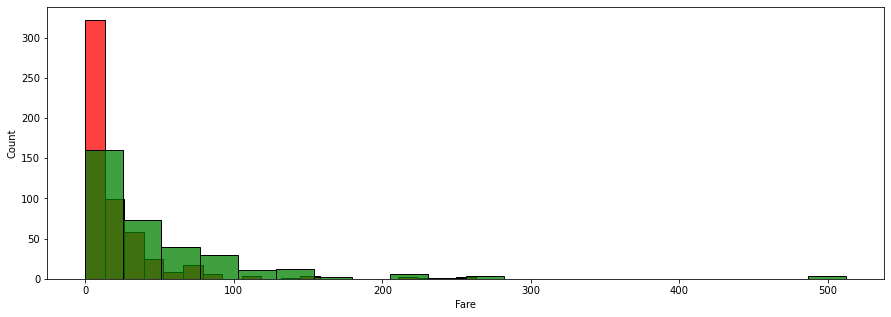

In [17]:
plt.figure(figsize=(15,5))
#titanic.Fare.value_counts()
#sns.histplot(titanic.Fare)
sns.histplot(titanic[titanic.Survived==0]['Fare'], color='r', legend=True, bins=20)
sns.histplot(titanic[titanic.Survived==1]['Fare'], color='g', legend=True, bins=20)

In [18]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,Cabin_available
Survived,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,0.123862
1,1.950292,28.343690,0.473684,0.464912,48.395408,0.397661


In [19]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_available
Age,,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.259104
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.107345


In [20]:
titanic.Age.max(), titanic.Age.min()

(80.0, 0.42)

### Plot continuous features

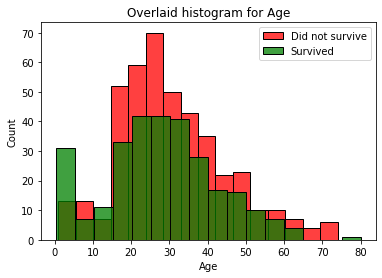

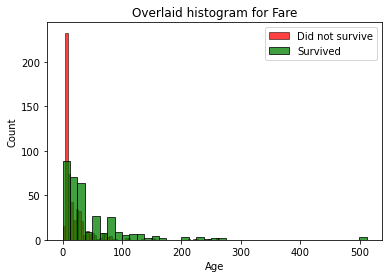

In [21]:
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    #xmin = min(min(died), min(survived))
    #xmax = max(max(died), max(survived))
    #width = (xmax - xmin) / 40
    sns.histplot(died, color='r', kde=False,) #bins=np.arange(xmin, xmax, width))
    sns.histplot(survived, color='g', kde=False,) #bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

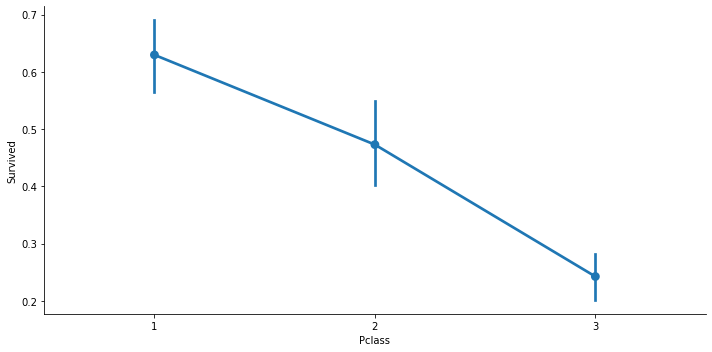

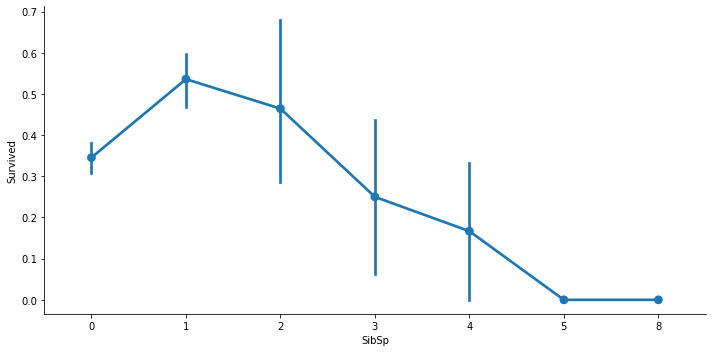

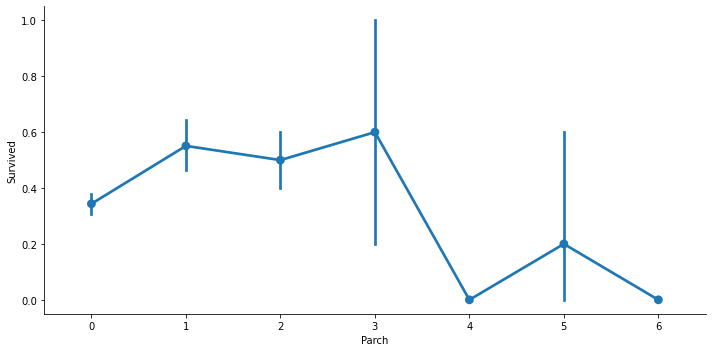

In [22]:
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2)

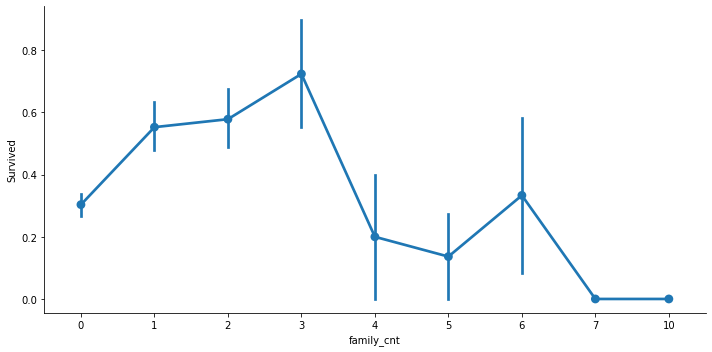

In [23]:
titanic['family_cnt'] = titanic['SibSp'] + titanic['Parch']

sns.catplot(x='family_cnt', y='Survived', data=titanic, kind='point', aspect=2)

In [24]:
titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Cabin_available', 'family_cnt'],
      dtype='object')

In [25]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_available,family_cnt
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,1,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,1,1
4,0,3,male,35.0,8.0500,S,0,0


Now moving on to Embarked column, Lets visualize how sex, Embarked and Cabin_availbility

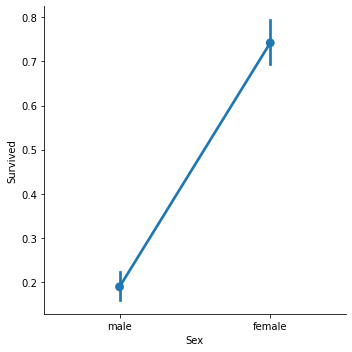

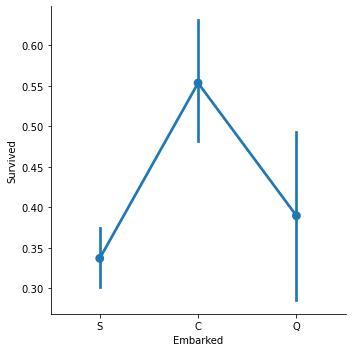

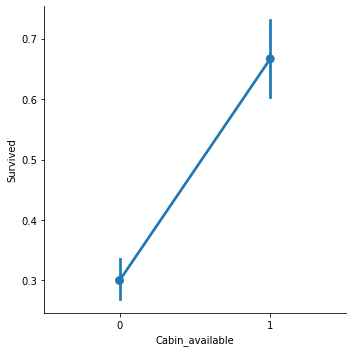

In [26]:
for col in ['Sex', 'Embarked', 'Cabin_available']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point')

Looking at Embarked, it is highly unlikely that place of boarding affected the survival rate, instead other features could be correlated, 

In [27]:
titanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


Here we can notice, that people who boarded in SouthAmpton, majority were males, and hence survival rate was low

In [28]:
titanic.pivot_table('Survived', index='Cabin_available', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_available,,,
0,99,73,515
1,69,4,129


Likewise, people who did not survive in SouthAmpton did not have Cabins, as a result , both these factors contributed to low survival rate 

Here, Sex and Cabin_available are good predictors where as Embarked is not

In [29]:
titanic.drop(['Embarked'], axis=1, inplace=True)

In [30]:
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})


In [31]:

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin_available,family_cnt
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [32]:
titanic.isna().sum()

Survived             0
Pclass               0
Sex                  0
Age                177
Fare                 0
Cabin_available      0
family_cnt           0
dtype: int64

In [35]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    int64  
 3   Age              891 non-null    float64
 4   Fare             891 non-null    float64
 5   Cabin_available  891 non-null    int64  
 6   family_cnt       891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


<AxesSubplot:>

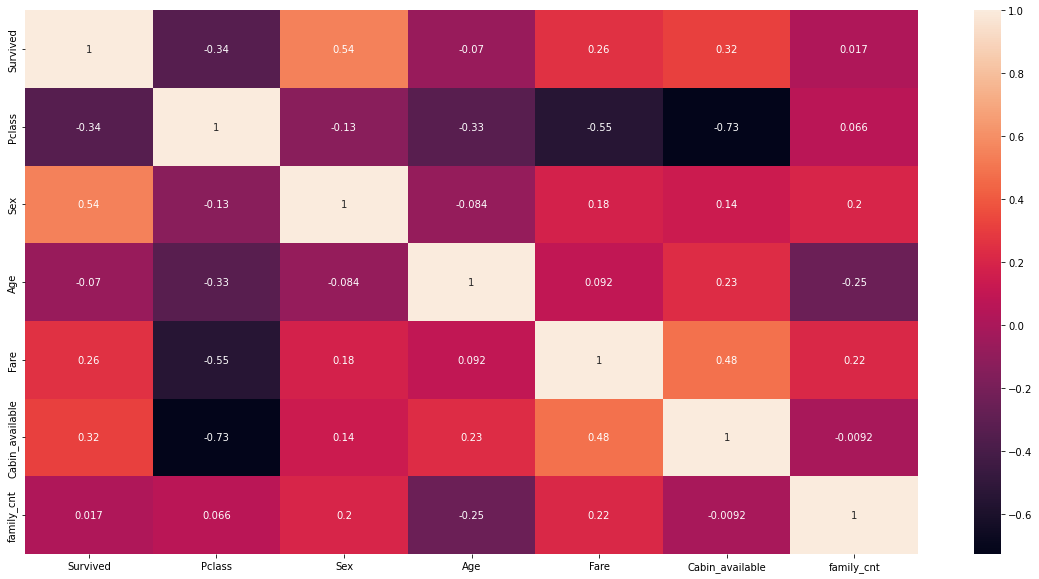

In [37]:
plt.figure(figsize=(20, 10))
sns.heatmap(titanic.corr(), annot=True, fmt='.2g')